# The Energy of a Quantum Physical Two-Body System

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

#planck = 6.626e-34
#reduced_planck = planck/(2*np.pi)
#e_mass = 9.109e-31

plotte bplgefunksjonene i start og slutt og sammeligne med 

## Constants

In [2]:
# Length of interval
L = 20
# No. of subintervals
N = 500
# Stepsize
h = L / N

# Argument vector
xi = np.linspace(-L/2, L/2, N)

## Functions

In [3]:
def v_func1(x, k = 1):
    """Returns the potential function of the quantum system"""
    return k*x**2/2

In [4]:
def v_func2(x, k=1):
    return 1 - np.exp(-(1/2)*k*x**2)

In [5]:
def psi_func(x, x0, sigma):
    """Returns the wave function"""
    #return np.sqrt(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-x0)**2/(4*sigma**2))
    return np.exp(-(x-x0)**2/(4*sigma**2))

In [6]:
def finite_difference_scheme():
    """Returns a matrix representation of a second order central finite difference scheme"""
    m = np.zeros((N,N))
    for i in range(N):
        m[i,i] = -2
        if i+1 < N:
            m[i,i+1] = 1
        if i-1 >= 0:
            m[i, i-1] = 1
            
    return 1/(h**2)*m

In [7]:
def compute_e(x0, sigma):
    """Evaluate and returns the energy at the give point"""
    psi_vector = np.array(psi_func(xi, x0, sigma)).reshape(-1,1)
    
    #kinetic_constant = -reduced_planck**2/(2*e_mass) # Kan være 1 inntil videre
    h_psi = -1/2*(finite_difference_matrix @ psi_vector) + (v_vector * psi_vector)
     
    e = h*(psi_vector.T @ h_psi) / (h*(psi_vector.T @ psi_vector))
    
    return e[0][0]

In [8]:
def finite_difference(x, y, isX=False):
    """Calculates the central finite difference approximation of a partial derivate with two variables"""
    if isX:
        return (compute_e(x+h, y) - compute_e(x-h, y))/2*h
   
    return (compute_e(x , y+h) - compute_e(x, y-h))/2*h

In [9]:
def gradient_step(x0, sigma, lr):
    # print(finite_difference_e(sigma, x0))
    new_x0 = x0 - lr*finite_difference(x0, sigma, isX=True)
    new_sigma = sigma - lr*finite_difference(x0, sigma, isX=False)
    return (new_x0, new_sigma)

In [17]:
def gradient_descent(x0, sigma, lr=1, max_iterations=10000):
    number_of_iterations = 0 
    e = compute_e(x0, sigma) # Initial calculation of energy level
    gradient_path_list = []
    
    while (number_of_iterations < max_iterations): # Breaks loop if maximum iterations is reached
    
        new_x0, new_sigma = gradient_step(x0, sigma, lr) # New values for x0 and sigma
        new_e = compute_e(new_x0, new_sigma) # New value for energy level
        
        if new_e > e: # Breaks out of loop if we start ascending
            break 
        
        x0, sigma, e =  new_x0, new_sigma, new_e # updates the variables with the new values
        gradient_path_list.append([x0, sigma, e]) # saving values for plotting
        number_of_iterations += 1
        
    print(f"Number of iterations: {number_of_iterations}")
    return x0, sigma, gradient_path_list

In [11]:
def create_plot_axes(x_min, x_max, x_step, y_min, y_max, y_step):
    
    """Creating surface for plotting"""

    X = np.arange(x_min, x_max, x_step)
    Y = np.arange(y_min, y_max, y_step)

    E = np.array([[compute_e(x, y) for y in Y] for x in X])

    X, Y = np.meshgrid(X, Y)
    
    return X, Y, E

In [12]:
def gradient_descent_plot(step_size, path):
    path = np.array(gradient_path_list) # transform the plot to a numpy array
    ax.plot(path[::step_size,0], path[::step_size,1], 
            path[::step_size, 2], 'bx-', label='path')

    ax.plot(path[-1:,0], path[-1:,1], 
            path[-1:, 2], markerfacecolor='r', marker='o', markersize=5, label='endpoint')

In [13]:
def plot_psi(ax, x0, sigma, *args, **kwargs):
    ax.plot(xi, psi_func(xi, x0, sigma), *args, **kwargs)

## Computing the Energy

Tweake parameter(lr, x0, sigma).
Lage plot
Sette stoppkriterier.


fasit
x0 = 0
sigma = 1/sqrt(2)
e = 0.5

In [14]:
x0 = 4
sigma = 3
gradient_path_list =[]

# Initializing vectors
v_vector = np.array(v_func2(xi)).reshape(-1, 1)
finite_difference_matrix = finite_difference_scheme()

# Finding lowes energy
e = compute_e(x0, sigma)
print(f"Energy at guess {e}")
new_x0, new_sigma, gradient_path_list = gradient_descent(x0, sigma,1, 20000) 
print(f"Found x0: {new_x0}, found sigma: {new_sigma}")
print(1/np.sqrt(2))
print(f"Found energy: {compute_e(new_x0, new_sigma)}")
print(f"Most accurate answer: {compute_e(0, 1/np.sqrt(2))}")

Energy at guess 1.0976618407666718
Number of iterations: 20000
Found x0: 0.17348816042182144, found sigma: 0.9246695496881009
0.7071067811865475
Found energy: 0.4184777871607144
Most accurate answer: 0.4344560318308466


<IPython.core.display.Javascript object>


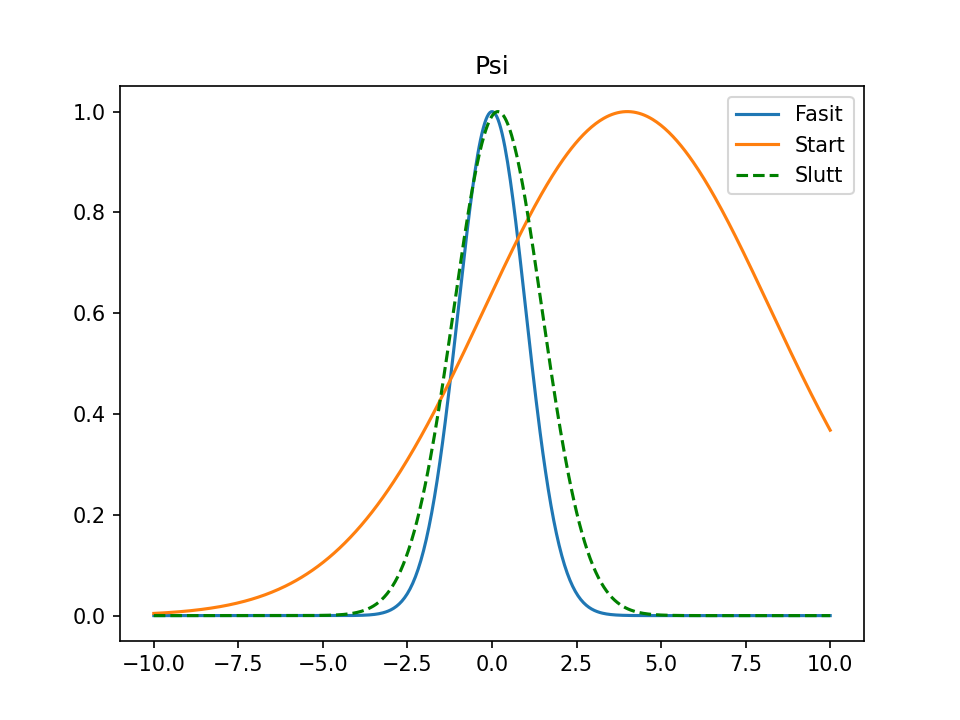

In [15]:
fig, ax = plt.subplots()
plt.title('Psi')
plot_psi(ax, 0, 1/np.sqrt(2), label = 'Fasit')
plot_psi(ax, x0, sigma, label = 'Start')
plot_psi(ax, new_x0, new_sigma, 'g--', label = 'Slutt')
plt.legend()

<IPython.core.display.Javascript object>


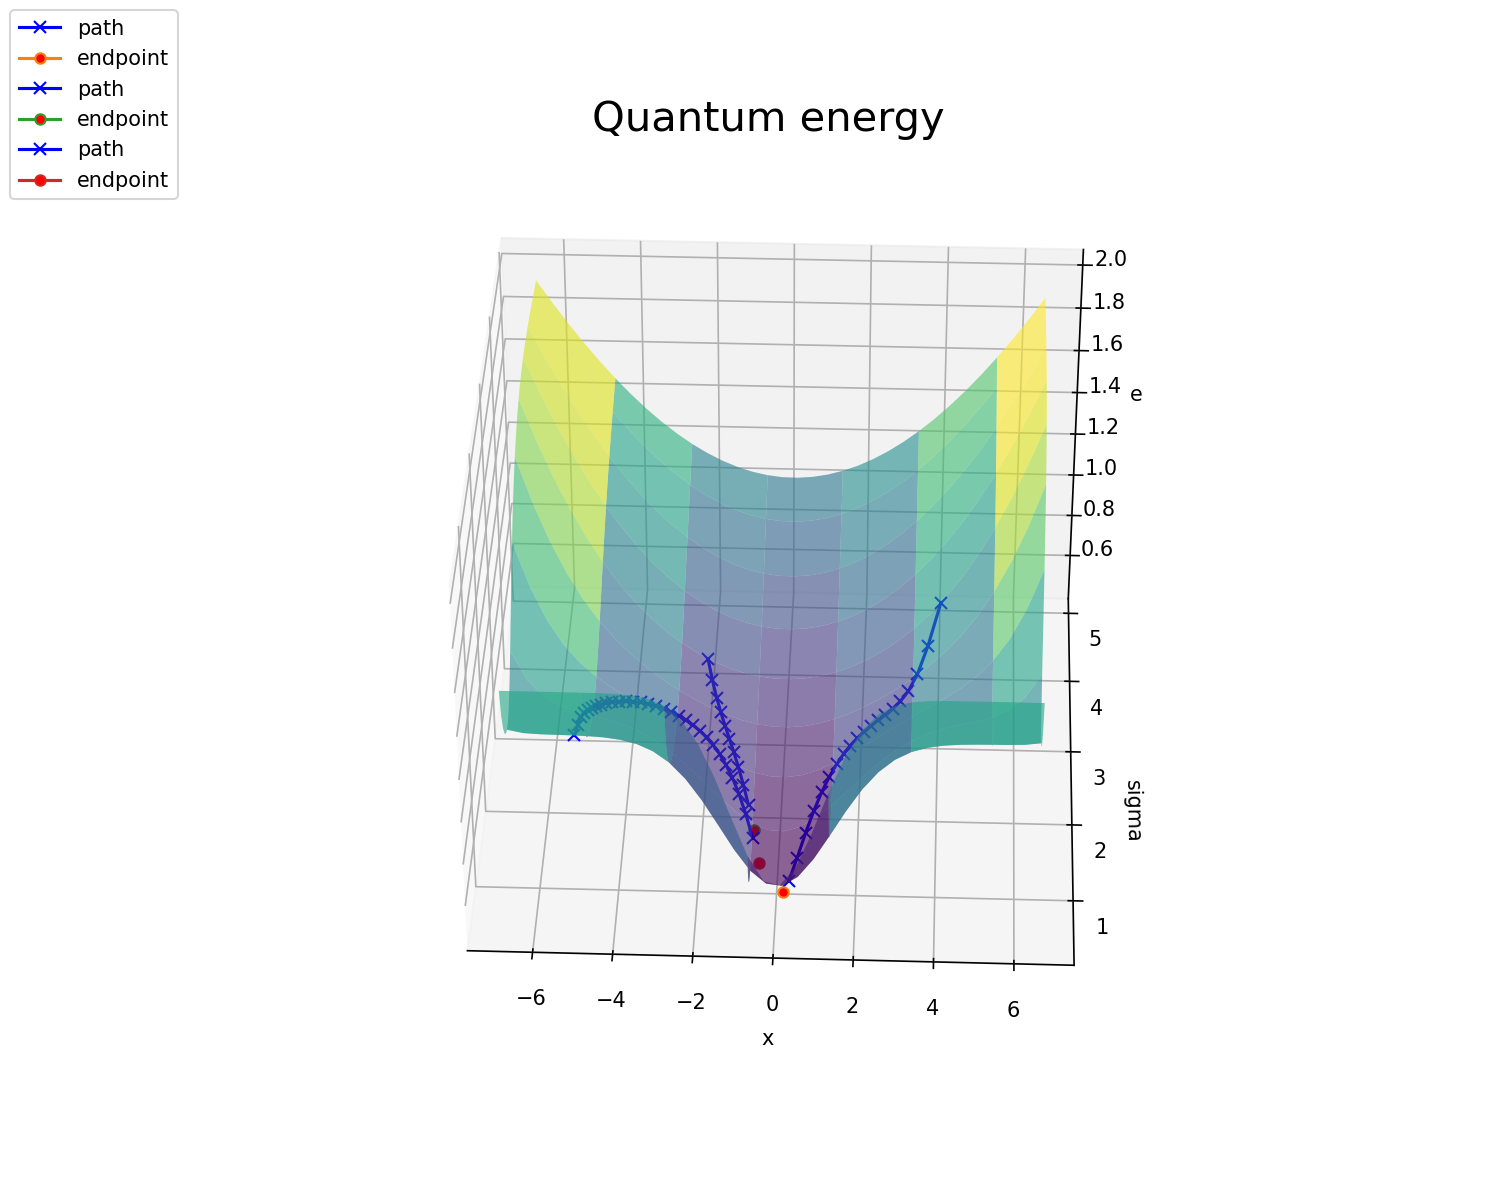

Number of iterations: 10000
Number of iterations: 30000


In [16]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
X, Y, E = create_plot_axes(-L/3, L/3, h*10, 0.5, 5, 0.1) 

#ax = Axes3D(fig) #gml måte
ax.plot_surface(X, Y, Z=E.T, rstride=5, cstride=5, cmap='viridis', alpha = 0.6)

gradient_descent_plot(1000, gradient_path_list)
new_x0, new_sigma, gradient_path_list = gradient_descent(-2, 3, 1) 
gradient_descent_plot(1000, gradient_path_list)
new_x0, new_sigma, gradient_path_list = gradient_descent(-5, 1,1, 30000) 
gradient_descent_plot(1000, gradient_path_list)

# Labels etc
ax.set_title('Quantum energy', fontdict={'fontsize': 20})
ax.set_xlabel('x')
ax.set_ylabel('sigma')
ax.set_zlabel('e')
ax.view_init(elev=35, azim=50)
fig.legend(loc='upper left')